
### Notebook Summary
- **Dataset**: US Accidents (2016-2023) from Kaggle. https://www.kaggle.com/sobhanmoosavi/us-accidents
- **Objective**: Perform ETL and EDA to derive insights about road accidents.
- **Steps**:
  - Cleaned and processed the dataset (ETL).
  - Conducted detailed analysis on city-wise, temporal, and weather patterns.
  - Identified actionable insights and provided recommendations.
- **Outcome**: Insights to improve road safety and traffic management.



### Task Notes

**ETL Notes**:
- Dropped columns with >25% missing values to maintain dataset quality.
- Handled missing values using statistical imputation (mean/median/mode).
- Managed duplicates and identified outliers using the IQR method.
- Generated new datetime-based features to enhance temporal analysis.

**EDA Notes**:
- Focused on city-wise, temporal, and weather-related accident patterns.
- Used visualizations (bar charts, heatmaps) to uncover trends.


# 1. Choose Dataset:


For this task, I have chosen the US Accidents Dataset, a comprehensive dataset that provides detailed information about car accidents in the United States. This dataset is publicly available and has been widely used for research purposes in the field of transportation safety. It contains rich attributes such as accident location, weather conditions, time of occurrence, severity level, and road features, making it ideal for an in-depth analysis of accident patterns and factors.

* The dataset focuses specifically on car accidents, aligning perfectly with the task's goal of understanding accident severity and its determinants with EDA (Exploratory Data Analysis).
* With over **7.7 million** records and numerous features, this dataset provides a robust foundation for exploratory analysis and predictive modeling.
* It has been collected and maintained with high standards, ensuring reliable and accurate insights.

**The primary objectives of this task are:**

* To analyze the factors contributing to car accidents, including environmental, temporal, and roadway characteristics.
* To identify patterns and key determinants of accident severity.
* To propose actionable recommendations for improving road safety and reducing accident severity.

**Workplan :**
* Data Extraction (Loading)
* Data Understanding and Preparation
* Data Cleaning: Address missing values, inconsistent formats, and outliers to ensure data quality (Transformation).
* Feature Engineering: Derive new features (e.g., time of day categories, weather severity index) to enrich the dataset.
* Explore the Dataset to understand the features, distributions, and any anomalies.


* Analysis and Insights, Univariate and Bivariate Analysis: Examine individual features and their relationships with accident severity.
* Temporal Analysis: Identify accident hotspots and seasonal trends.

## Extracting Data

**Step: Dataset Extraction:** The dataset is downloaded from Kaggle using the provided URL. Ensure the 'opendatasets' library is installed.

**Explanation:**  
* The dataset is being downloaded from Kaggle using the opendatasets library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as ods

In [2]:
# Kaggle dataset URL
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

# Download the dataset
ods.download(download_url)

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


## Loading data

**Step: Data Loading:** The dataset is loaded into a pandas DataFrame for further analysis.

**Explanation:**
* The dataset is being loaded into a pandas DataFrame to make it easier to explore and analyze.
* This step is crucial for performing ETL and EDA processes.

In [3]:
# read & load the dataset into pandas dataframe
df = pd.read_csv('us-accidents/US_Accidents_March23.csv')

# 2. Clean your data:
- Evaluate the quality of data.
- Identify relevant features.
- Missing values or any additional operations ? (use different missing appraoches to tackle the missing values issue, create different data variants for a later comparison).   
- statistics, check data types, conversions and more ?
- Divide data into two parts one for experiments, another portion for validation (explain the logic of your splitting).

## Data preparation

In [4]:
US_Accidents=df.copy()

In [5]:
US_Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [6]:
#check for duplicates
US_Accidents.duplicated().sum()
US_Accidents = US_Accidents.drop_duplicates()

In [7]:
missing_values = US_Accidents.isnull().sum()
missing_values = missing_values.sort_values(ascending = False)
missing_values

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

## Missing Values

**Step: Exploratory Data Analysis (EDA):** This visualization provides insights into [specific aspect, e.g., accident trends or features].

**Explanation:**  
* This step involves visualizing the dataset to uncover trends, patterns, and distributions.  
* Insights derived from these visualizations will be summarized below.


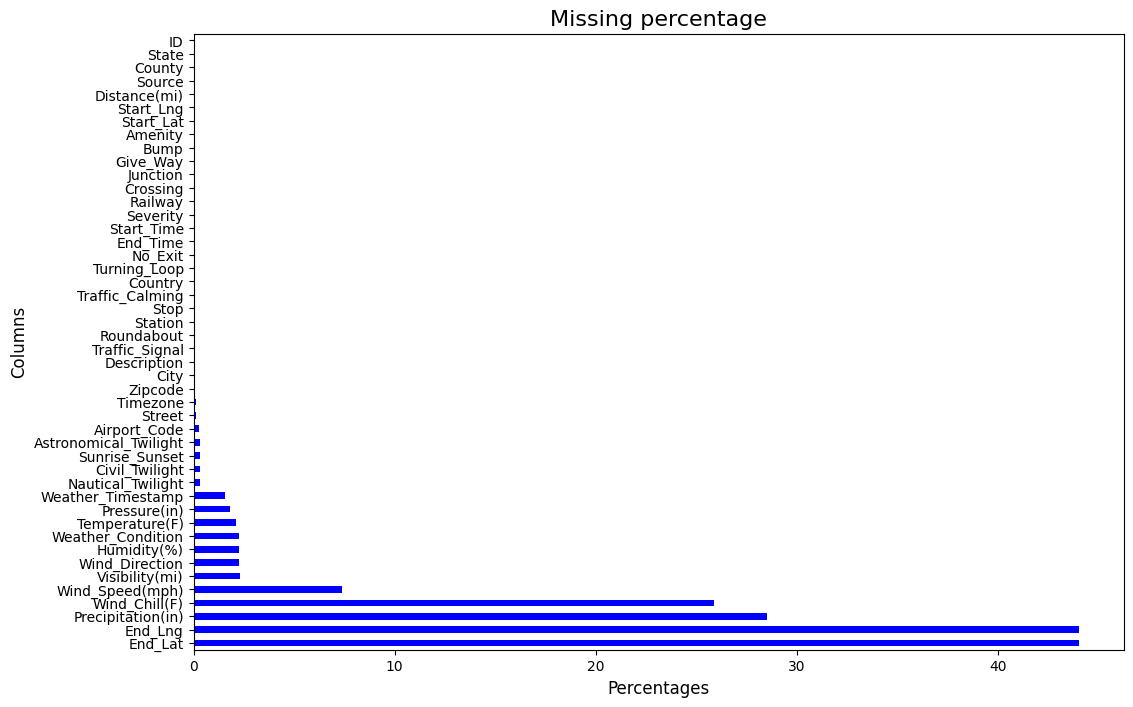

In [8]:
# see are the missing value by Percentage
missing_percentage = US_Accidents.isnull().sum().sort_values(ascending=False)/len(US_Accidents)*100
plt.figure(figsize=(12, 8))

missing_percentage.plot(kind='barh', color='blue')

plt.title('Missing percentage', fontsize=16)
plt.xlabel('Percentages', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.show()

In [9]:
# Dropping columns with more than 25% missing percentage
columns_to_drop = missing_percentage[missing_percentage > 25].index
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [10]:
num_cols=US_Accidents.select_dtypes(include=['float64','int64']).columns
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

In [11]:
US_Accidents[num_cols].describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,5.618423e-01,6.166329e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00
std,4.875313e-01,5.076079e+00,1.739176e+01,1.776811e+00,1.901365e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,0.000000e+00,4.900000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.000000e-02,6.400000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03


In [12]:
import warnings
warnings.filterwarnings('ignore')

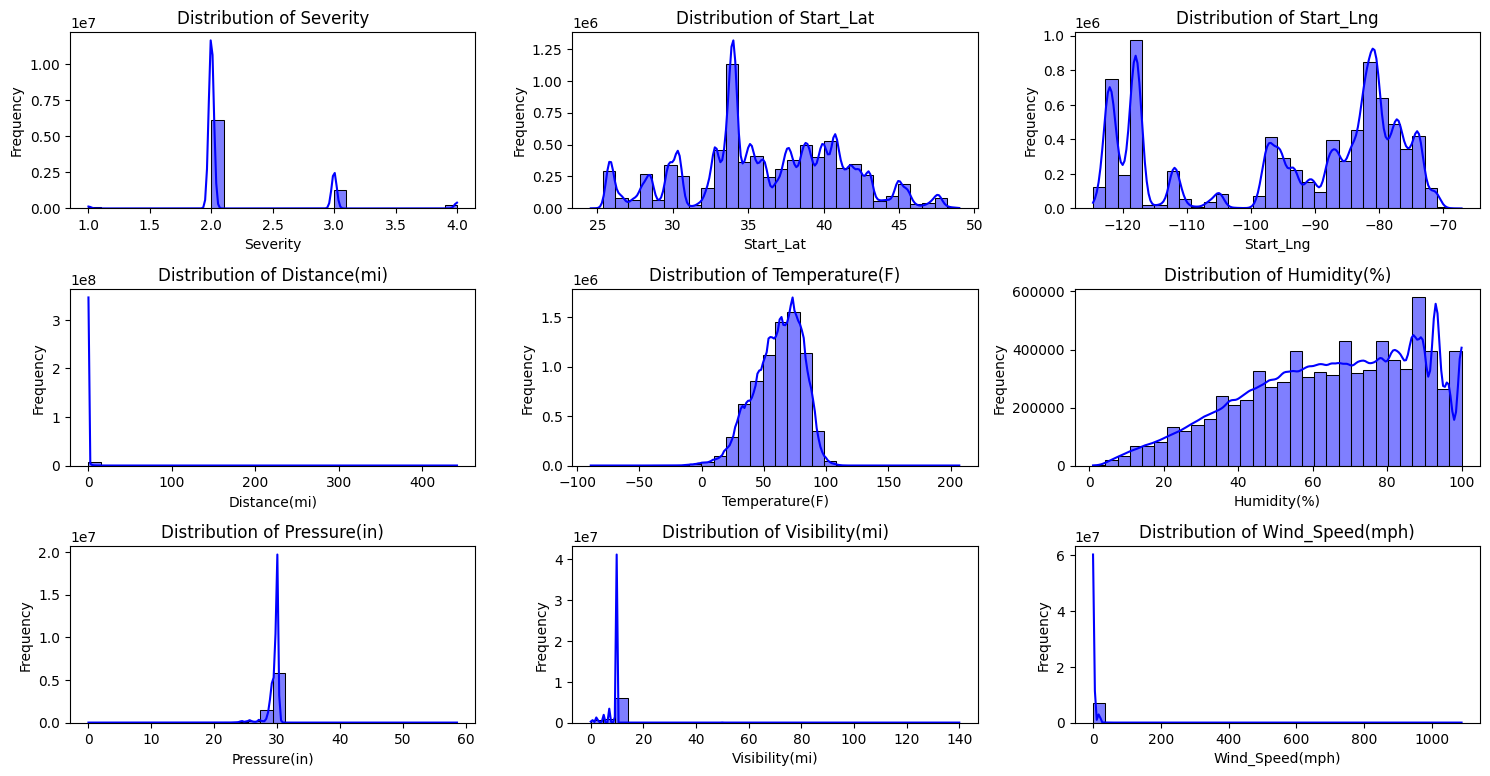

In [13]:
# Plot the distribution of each numerical column to see how to impute the missing values
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols) // 3 + 1, 3, i)
    sns.histplot(US_Accidents[col], kde= True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
# i will use the mean for filling  Temperature(F) due to its symmetry
# and the median for other columns to mitigate the effects of outliers and skewed distributions.
US_Accidents['Temperature(F)']=US_Accidents['Temperature(F)'].fillna(US_Accidents['Temperature(F)'].mean())

fill_with_median = [col for col in num_cols if col != 'Temperature(F)']
US_Accidents[fill_with_median]=US_Accidents[fill_with_median].fillna(US_Accidents[fill_with_median].median())

In [15]:
# mode for the categorical cols
US_Accidents[cat_cols]=US_Accidents[cat_cols].fillna(US_Accidents[cat_cols].mode().iloc[0])

In [16]:
US_Accidents.isnull().sum()

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

## Feature selection


In [17]:
#Dropping columns that are not part of the analysis
# List of columns to drop
columns_to_drop = ['ID', 'Description', 'County', 'Zipcode', 'Timezone', 'Airport_Code',
                   'Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
# Drop the columns
US_Accidents = US_Accidents.drop(columns=columns_to_drop)

In [18]:
# check for unique values of each col
cat_cols=US_Accidents.select_dtypes(include=['object']).columns

for cat in cat_cols:
    print(cat, US_Accidents[cat].nunique())

Source 3
Start_Time 6131796
End_Time 6705355
Street 336306
City 13678
State 49
Country 1
Weather_Timestamp 941331
Weather_Condition 144
Sunrise_Sunset 2


In [19]:
#drop country col because it has only one value
US_Accidents = US_Accidents.drop(columns=['Country'])

- I will encode the categorical features later before the modeling because i need the categories to better understand the EDA analysis

## Class Distribution

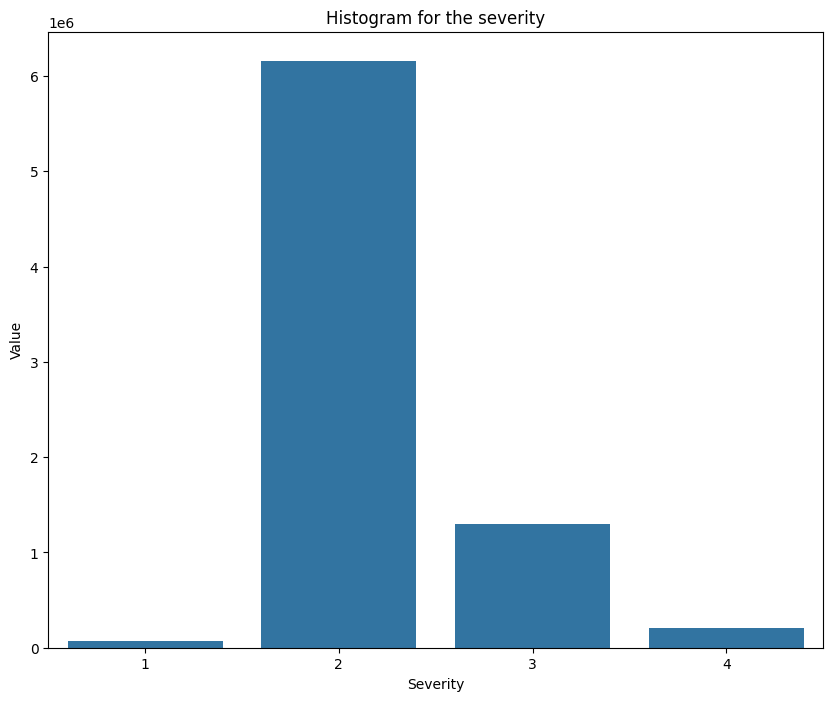

In [20]:
#check if the data is unbalenced
severity_counts = US_Accidents["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

- The severity attribute as we can see from the previous plot is highly unbalanced, the number of accident with the severity 1 is very small instead the number of accident with severity 2 is much higher. So, in order to balance the data we are going to undersample all the categories to the number of records of the minority category, in this case the severity 1.

# 3. Exploratory Data Analysis
- Describe the methodology you will follow to achieve your objectives, relatioships analysis ? feature engineering ?
- Apply your appraoch, and cite your findings.
- Draft a conclusion, and define new operations.
- Use visaluzation to understand your findings.


## Feature scaling


In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalermax = MinMaxScaler()
scalerstd = StandardScaler()
fill_with_median = [col for col in fill_with_median if col != 'Severity']
US_Accidents[fill_with_median] = scalermax.fit_transform(US_Accidents[fill_with_median])
US_Accidents['Temperature(F)'] = scalerstd.fit_transform(US_Accidents[['Temperature(F)']])

## EDA with visualization

- In the upcoming phase of our analysis, we are poised to construct a series of informative visualizations as part of our Exploratory Data Analysis (EDA). Our strategic visualization approach encompasses the following key objectives:

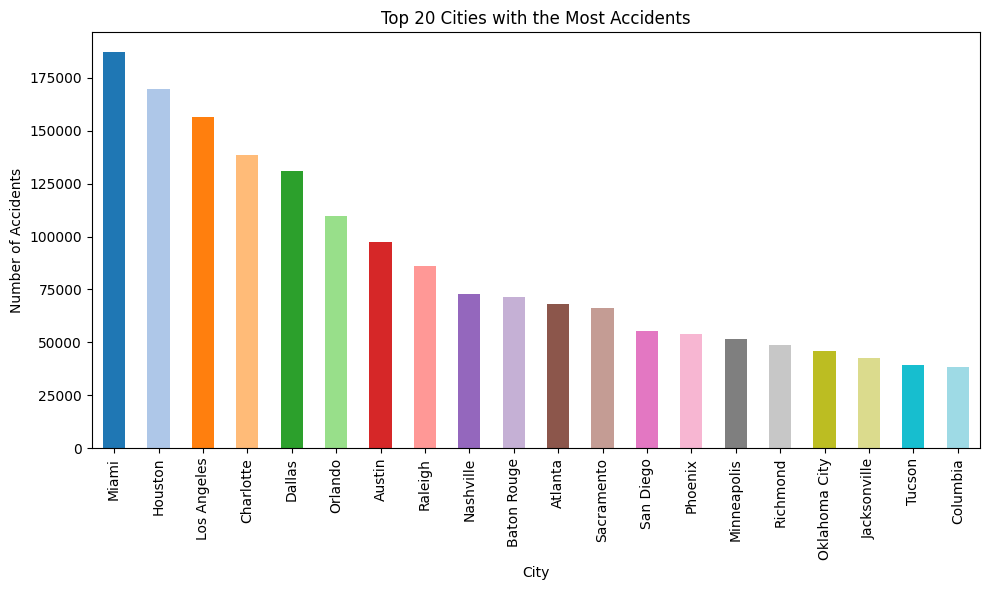

In [22]:
#Analysis by location:
# Get the top 20 cities with the most accidents
accidents_by_city = US_Accidents['City'].value_counts()

top_20_cities = accidents_by_city.head(20)

# Create the bar plot
plt.figure(figsize=(10, 6))
color_range = range(50)
top_20_cities.plot(kind='bar', color=plt.get_cmap('tab20')(range(len(color_range))))

plt.title('Top 20 Cities with the Most Accidents')
plt.xlabel('City')
plt.ylabel('Number of Accidents')

# Show the bar plot
plt.tight_layout()
plt.show()

* we can see that most of the cities have the very few accidents there is very few cities which have the very high accidenets.
* Miami is the highest city with high number of accidents

<Axes: xlabel='Start_Time', ylabel='Density'>

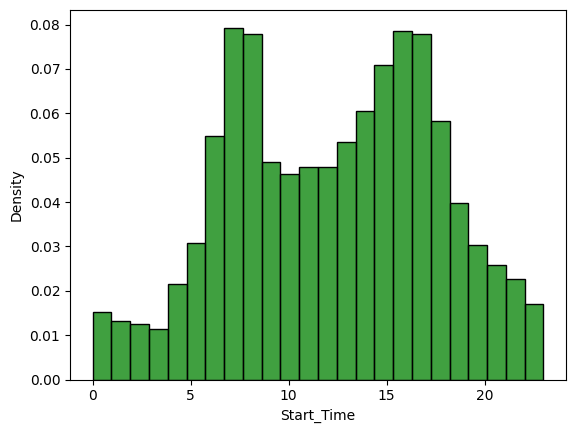

In [23]:
#Analaysis by Date
US_Accidents.Start_Time = pd.to_datetime(US_Accidents['Start_Time'] , format='mixed', errors='coerce' )
sns.histplot( US_Accidents.Start_Time.dt.hour , bins = 24 , kde = False, stat = 'density' ,color = 'green')

we see that most of the Accidents occured in between the 6am to 9am and other is 2pm to 6pm

<Axes: xlabel='Start_Time', ylabel='Density'>

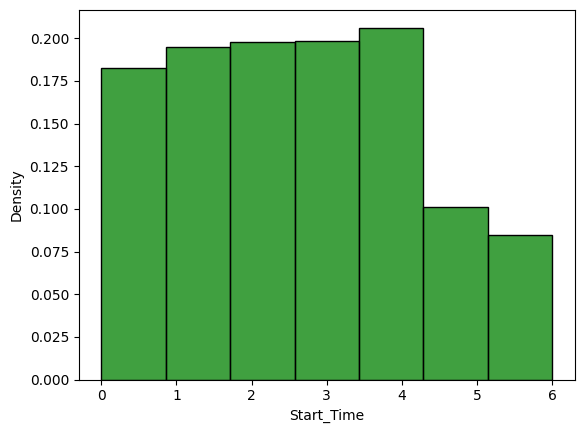

In [24]:
# US_Accidents.Start_Time.dt.day this give the day (actually the date from 30 days)
sns.histplot( US_Accidents.Start_Time.dt.dayofweek , bins = 7 , kde = False , stat = 'density' , color = 'green')
# this give the day position in week...  0 : sunday , 1 : monday , 2 : tuesday , 3 :wednesday

- As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have less accidents. This may be due to the fact that during the weekend there are fewer cars on the road.

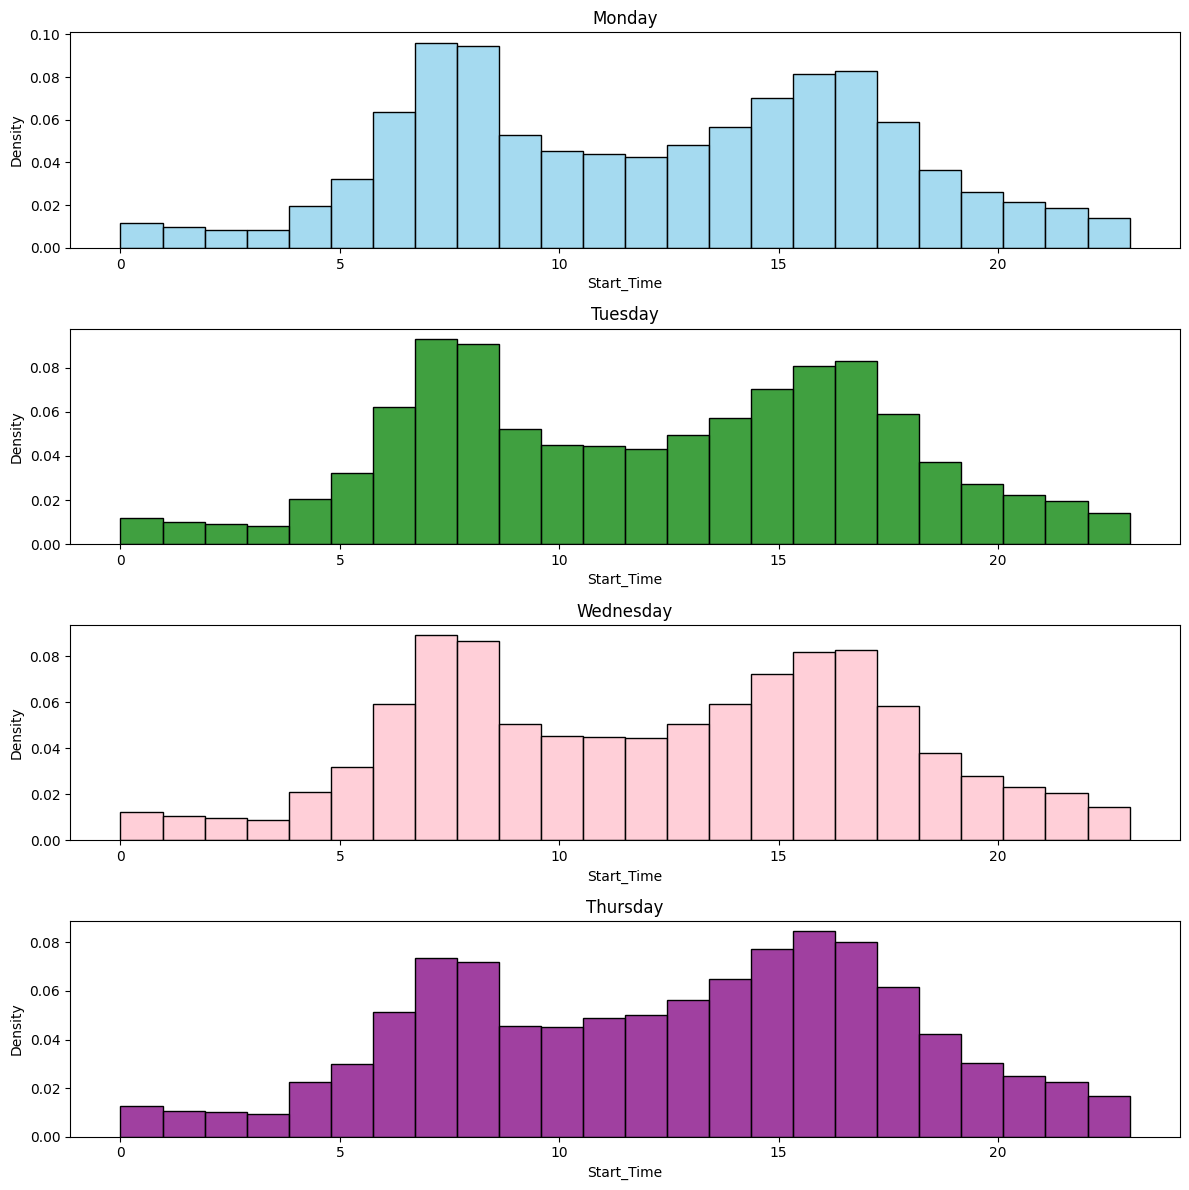

In [25]:
# checkout the distribution of accident on normal working day...

mon_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 1]
tues_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 2]
wednes_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 3]
thurs_day = US_Accidents.Start_Time[US_Accidents.Start_Time.dt.dayofweek == 4]

fig, axis = plt.subplots(4, 1, figsize=(12, 12))

sns.histplot(mon_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue').set_title('Monday')
sns.histplot(tues_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green').set_title('Tuesday')
sns.histplot(wednes_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[2], color='pink').set_title('Wednesday')
sns.histplot(thurs_day.dt.hour, bins=24, kde=False, stat='density', ax=axis[3], color='purple').set_title('Thursday')

fig.tight_layout()

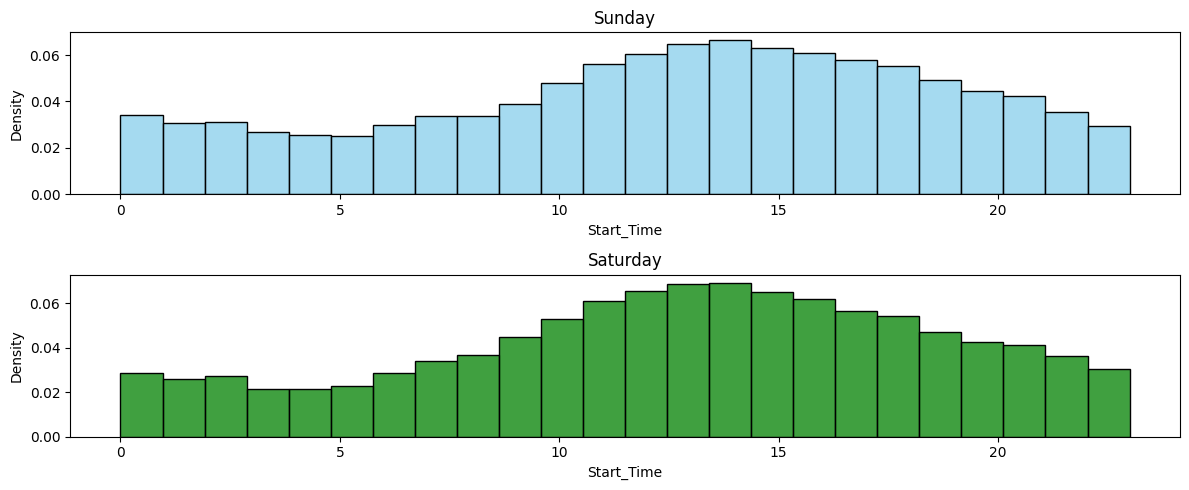

In [26]:
# now let's checkout the distribution of accident time on the weekends
sun_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 6]
sat_day = US_Accidents[US_Accidents.Start_Time.dt.dayofweek == 5]

fig, axis = plt.subplots(2, 1, figsize=(12, 5))

sns.histplot(sun_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[0], color='skyblue')
axis[0].set_title('Sunday')

sns.histplot(sat_day.Start_Time.dt.hour, bins=24, kde=False, stat='density', ax=axis[1], color='green')
axis[1].set_title('Saturday')

fig.tight_layout()

plt.show()

- We can see that thare is the diffrance between the distributioin of the accident time in weekends and normal days
in weekends generally all accidents are happends after 10 am to 3pm while normal day it occured in between the 6am to 9am and then 3 pm to 5 pm

<Axes: ylabel='Weather_Condition'>

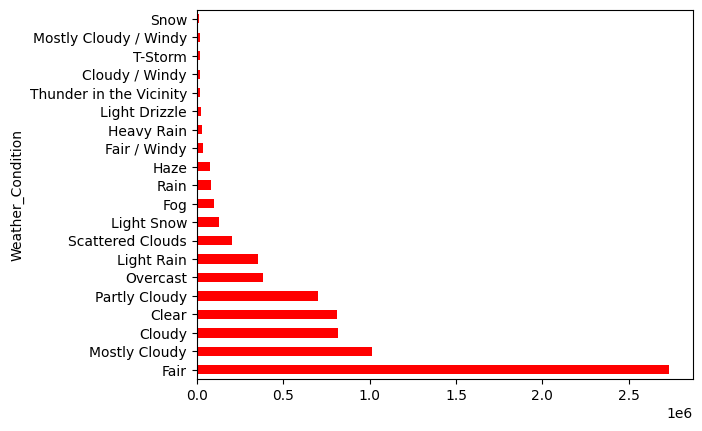

In [27]:
US_Accidents.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'red')

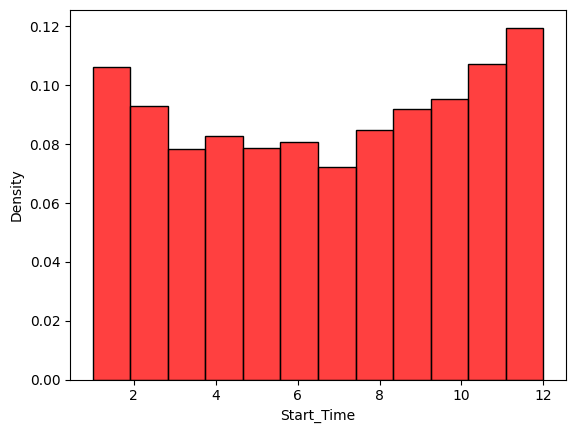

In [28]:
sns.histplot(US_Accidents.Start_Time.dt.month, kde=False, bins=12, stat='density', color='red')
plt.show()

- So, in Winter and Rainy seasons there is more chances of occuring accidents

## Datetime Variables

In [29]:
# handle datetime variables
US_Accidents['Start_Time'] = pd.to_datetime(US_Accidents['Start_Time'], errors='coerce', format='mixed')
US_Accidents['End_Time'] = pd.to_datetime(US_Accidents['End_Time'], errors='coerce', format='mixed')

### Feature extraction

In [30]:
# extract Relevant Features
US_Accidents['Start_Year'] = US_Accidents['Start_Time'].dt.year
US_Accidents['Start_Month'] = US_Accidents['Start_Time'].dt.month
US_Accidents['Start_Day'] = US_Accidents['Start_Time'].dt.day
US_Accidents['Start_Hour'] = US_Accidents['Start_Time'].dt.hour
US_Accidents['Start_Weekday'] = US_Accidents['Start_Time'].dt.weekday  # Monday=0, Sunday=6
US_Accidents['Is_Weekend'] = US_Accidents['Start_Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [31]:
# drop the start time and end time variables
US_Accidents = US_Accidents.drop(columns=['Start_Time', 'End_Time'])

## Feature Encoding

In [32]:
# encoding 'Source'(3 cat) , 'Sunrise_Sunset'(2cat) with one hot encoding beacuse they don't have a lot of categories
US_Accidents = pd.get_dummies(US_Accidents, drop_first=True, columns=['Source', 'Sunrise_Sunset'])

In [33]:
# encoding street ,Weather_Timestamp, with target encoding because they have a lot of categories
# For 'Street'
street_mean = US_Accidents.groupby('Street')['Severity'].mean()
US_Accidents['Street'] = US_Accidents['Street'].map(street_mean)

# For 'Weather_Timestamp'
timestamp_mean = US_Accidents.groupby('Weather_Timestamp')['Severity'].mean()
US_Accidents['Weather_Timestamp'] = US_Accidents['Weather_Timestamp'].map(timestamp_mean)

# For 'city'
timestamp_mean = US_Accidents.groupby('City')['Severity'].mean()
US_Accidents['City'] = US_Accidents['City'].map(timestamp_mean)

# For 'weather_condition'
timestamp_mean = US_Accidents.groupby('Weather_Condition')['Severity'].mean()
US_Accidents['Weather_Condition'] = US_Accidents['Weather_Condition'].map(timestamp_mean)


In [34]:
#encode State with binary encoding
from category_encoders import BinaryEncoder
state_encoder = BinaryEncoder()
state_encoded = state_encoder.fit_transform(US_Accidents['State'])
US_Accidents = pd.concat([US_Accidents, state_encoded], axis=1)

# drop state
US_Accidents = US_Accidents.drop(columns=['State'])

In [35]:
US_Accidents.dtypes

Severity                  int64
Start_Lat               float64
Start_Lng               float64
Distance(mi)            float64
Street                  float64
City                    float64
Weather_Timestamp       float64
Temperature(F)          float64
Humidity(%)             float64
Pressure(in)            float64
Visibility(mi)          float64
Wind_Speed(mph)         float64
Weather_Condition       float64
Amenity                    bool
Bump                       bool
Crossing                   bool
Give_Way                   bool
Junction                   bool
No_Exit                    bool
Railway                    bool
Roundabout                 bool
Station                    bool
Stop                       bool
Traffic_Calming            bool
Traffic_Signal             bool
Turning_Loop               bool
Start_Year                int32
Start_Month               int32
Start_Day                 int32
Start_Hour                int32
Start_Weekday             int32
Is_Weeke

- All of the feature are numerical

## Correlation Analysis

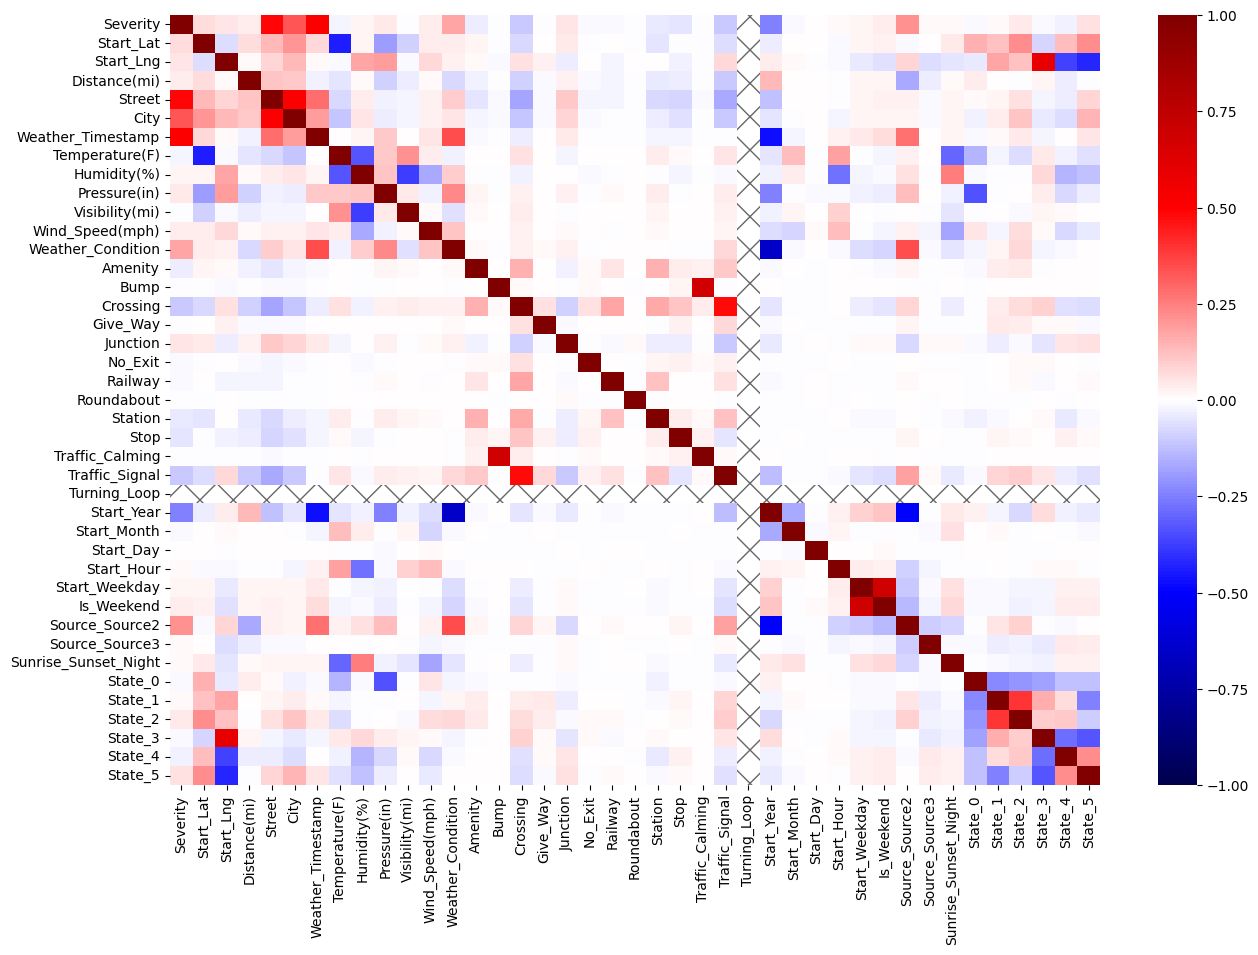

In [36]:
corr_matrix = US_Accidents.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

### Correlation Analysis Insights

#### 1. **Severity Correlation**
- The `Severity` of accidents shows a moderate correlation with some environmental factors like `Weather_Condition` and `Temperature(F)`, indicating that weather and temperature might have an impact on accident severity.
- The correlation between `Severity` and `Distance(mi)` is noticeable, suggesting that longer accident distances could indicate higher severity levels.

#### 2. **Environmental Factors**
- `Humidity(%)`, `Pressure(in)`, and `Visibility(mi)` are weakly correlated with each other but might have some combined effects on accidents.
- `Wind_Speed(mph)` has almost no significant correlation with other variables, suggesting it might not be a major factor in accidents.

#### 3. **Temporal Features**
- `Start_Hour` and `Start_Weekday` exhibit correlations with `Severity`, possibly reflecting peak traffic hours or weekdays influencing accident occurrences.
- `Is_Weekend` has a weak negative correlation with `Start_Weekday`, as expected, and a minimal correlation with `Severity`.

#### 4. **Geographical Variables**
- `Start_Lat` and `Start_Lng` are highly correlated with each other, which makes sense geographically.
- No strong correlation exists between location and `Severity`.

#### 5. **Infrastructure and Features**
- Features like `Traffic_Signal`, `Crossing`, and `Junction` have weak correlations with `Severity`. This might indicate that their presence does not significantly impact the severity of accidents.
- `Bump`, `Roundabout`, and `Traffic_Calming` features show almost no correlation with other variables, suggesting limited influence on the overall dataset.

#### 6. **State and Source**
- The `State_X` variables do not exhibit strong correlations with other features, which might mean they are more categorical indicators rather than continuous influencers.
- `Source_X` variables have weak correlations, indicating that data sources do not significantly affect accident characteristics.

#### 7. **Conclusion**
- While the correlations are generally weak, certain temporal (e.g., `Start_Hour`, `Start_Weekday`), environmental (`Weather_Condition`, `Visibility(mi)`), and geographical (e.g., `Distance(mi)`) features might require further investigation as they could influence accident severity.
- This analysis highlights the need for advanced techniques like feature importance using machine learning to uncover deeper insights.


## Handling Outliers

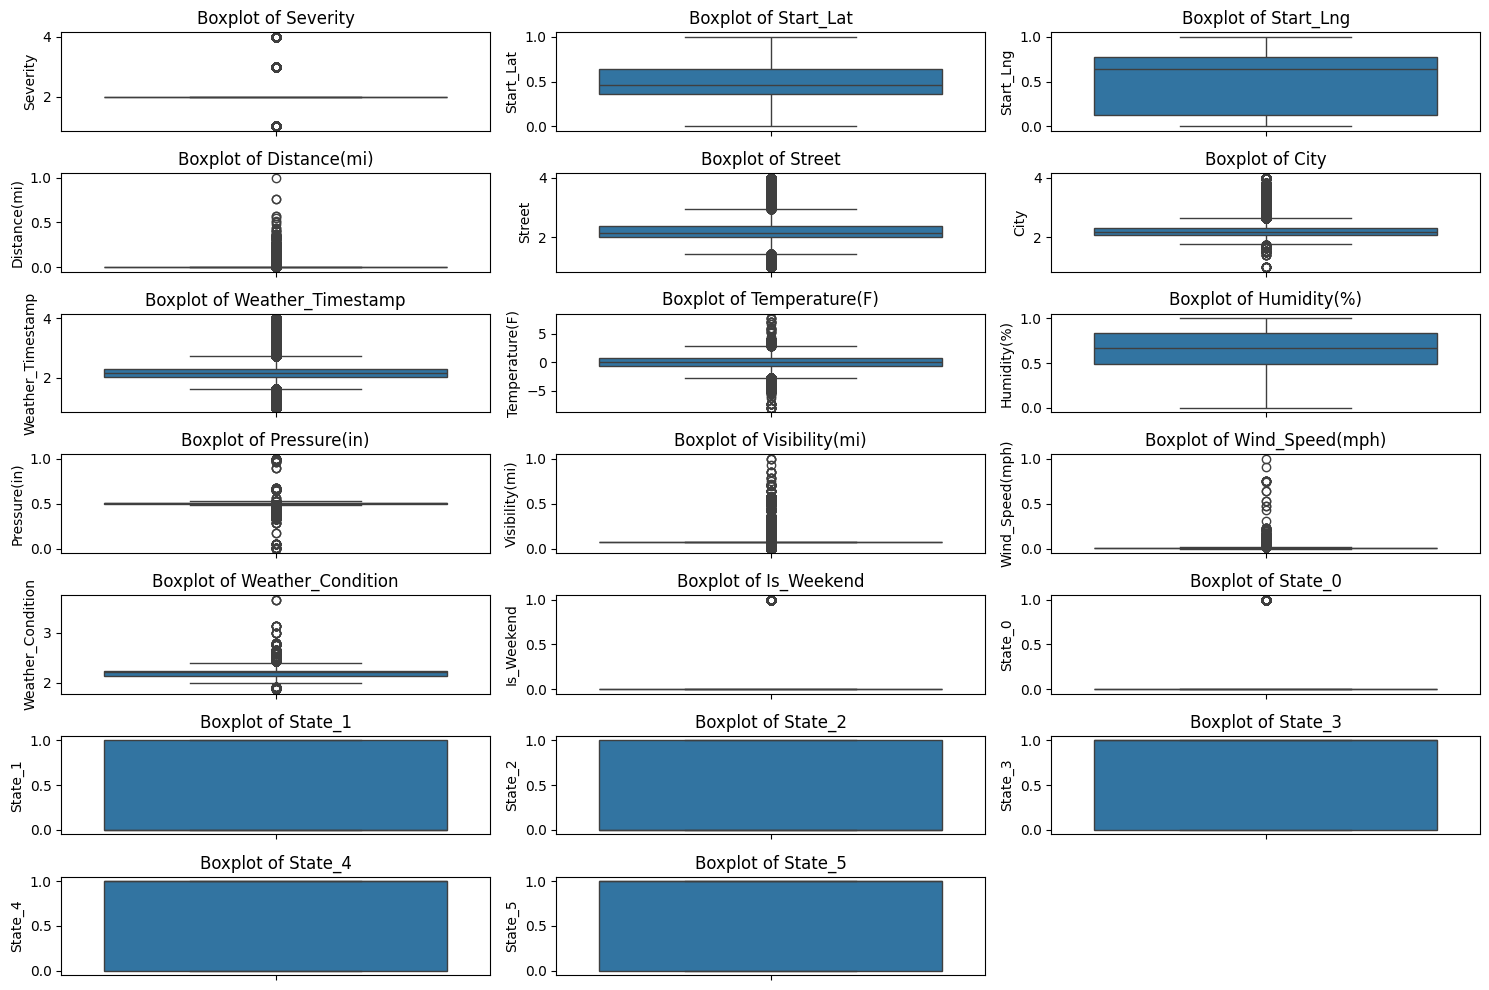

Column: Severity
Number of outliers: 1571413
--------------------
Column: Start_Lat
Number of outliers: 0
--------------------
Column: Start_Lng
Number of outliers: 0
--------------------
Column: Distance(mi)
Number of outliers: 963606
--------------------
Column: Street
Number of outliers: 61081
--------------------
Column: City
Number of outliers: 112293
--------------------
Column: Weather_Timestamp
Number of outliers: 343990
--------------------
Column: Temperature(F)
Number of outliers: 65279
--------------------
Column: Humidity(%)
Number of outliers: 0
--------------------
Column: Pressure(in)
Number of outliers: 449443
--------------------
Column: Visibility(mi)
Number of outliers: 1481065
--------------------
Column: Wind_Speed(mph)
Number of outliers: 291148
--------------------
Column: Weather_Condition
Number of outliers: 10137
--------------------
Column: Is_Weekend
Number of outliers: 1231427
--------------------
Column: State_0
Number of outliers: 922756
----------------

In [37]:
# check the outliers of this dataset

numerical_cols = US_Accidents.select_dtypes(include=['float64', 'int64']).columns

# Box plots for outlier visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=US_Accidents[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Calculate IQR and identify outliers for each numerical column
outlier_info = {}  # Store outlier information for each column

for col in numerical_cols:
    Q1 = US_Accidents[col].quantile(0.25)
    Q3 = US_Accidents[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = US_Accidents[(US_Accidents[col] < lower_bound) | (US_Accidents[col] > upper_bound)]

    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': len(outliers),
    }

    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print("-" * 20)

In [38]:
# Handle outliers using IQR method

#remove severity from the numerical cols
numerical_cols = numerical_cols.drop('Severity')
for col in numerical_cols:
    Q1 = US_Accidents[col].quantile(0.25)
    Q3 = US_Accidents[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    US_Accidents[col] = np.where(US_Accidents[col] < lower_bound, lower_bound, US_Accidents[col])
    US_Accidents[col] = np.where(US_Accidents[col] > upper_bound, upper_bound, US_Accidents[col])

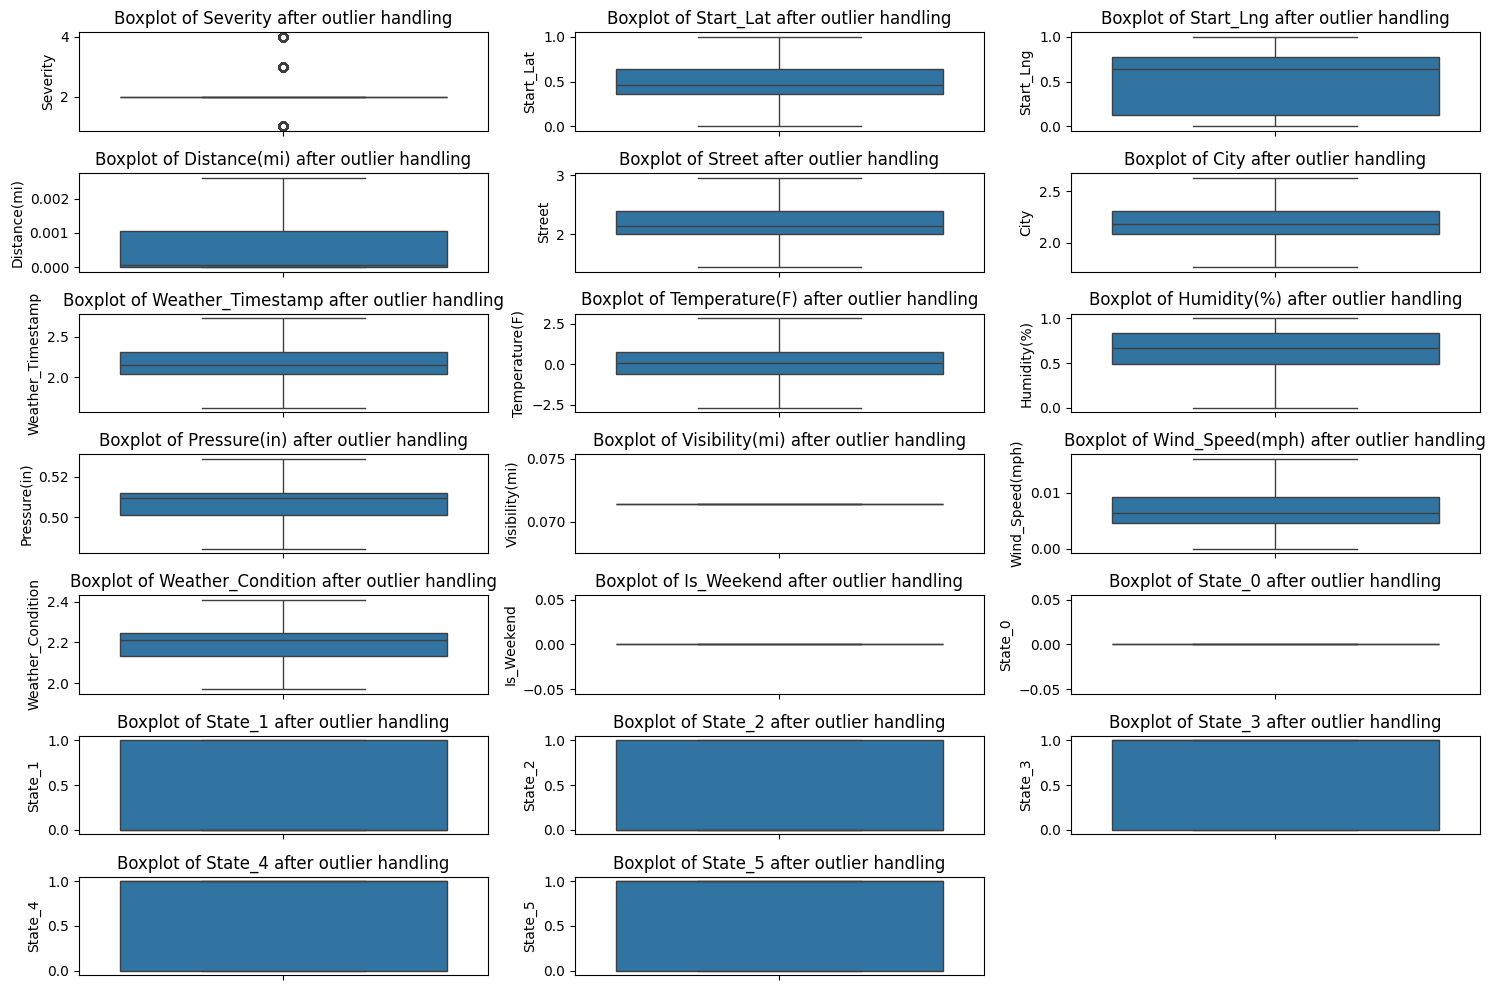

In [39]:
# Check for outliers after handling them
numerical_cols = US_Accidents.select_dtypes(include=['float64', 'int64']).columns

# Box plots for outlier visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=US_Accidents[col])
    plt.title(f'Boxplot of {col} after outlier handling')

plt.tight_layout()
plt.show()

## Undersampling data

In [40]:
# create a second version of data for undersampling
size = len(US_Accidents[US_Accidents["Severity"] == 1].index)
df_list = []  # Collect DataFrames in a list

for i in range(1, 5):
    S = US_Accidents[US_Accidents["Severity"] == i]
    df_list.append(S.sample(size, replace=True, random_state=42))

US_AccidentsV2 = pd.concat(df_list, ignore_index=True)


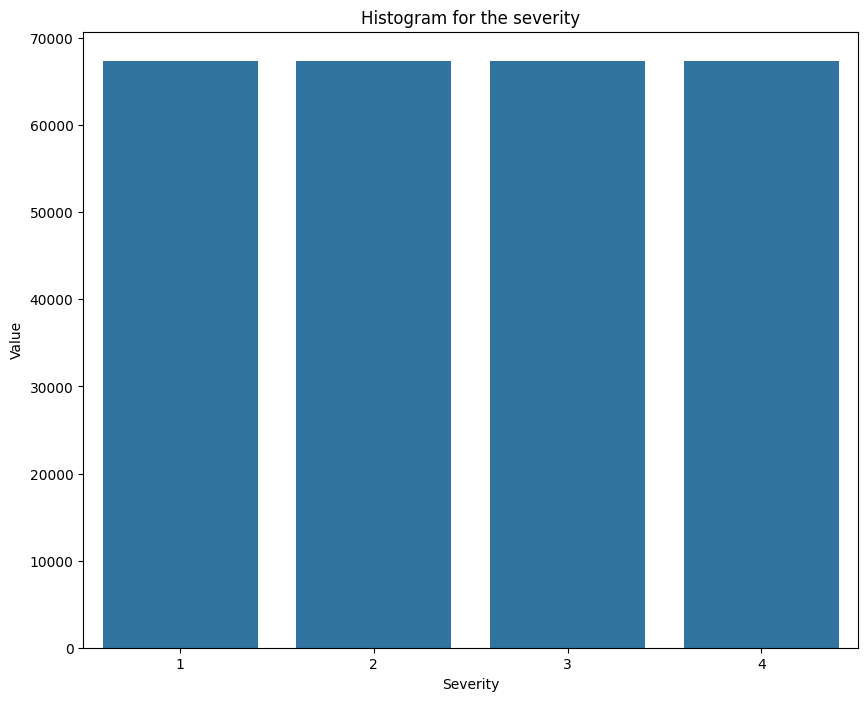

In [41]:
severity_counts = US_AccidentsV2["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

## Results from the EDA (Exploratory Data Analysis)

1. **City-wise Accident Distribution**  
   - The majority of cities have very few accidents, while only a small number of cities experience a significantly higher number of accidents.  
   - **Miami** stands out as the city with the highest number of accidents.

2. **Time of Day Impact**  
   - Most accidents occur during two time windows: **6 AM to 9 AM** (morning rush hour) and **2 PM to 6 PM** (afternoon and evening rush hours).

3. **Weekday vs. Weekend Trends**  
   - **Weekdays:** Higher number of accidents, likely due to increased traffic from work-related commutes.  
   - **Weekends:** Fewer accidents occur, possibly because there are fewer cars on the road.  

4. **Time Distribution on Weekends vs. Weekdays**  
   - On **weekends**, accidents are more likely to happen between **10 AM and 3 PM**.  
   - On **weekdays**, accidents are concentrated during **6 AM to 9 AM** and **3 PM to 5 PM**.

5. **Seasonal Trends**  
   - Accidents are more likely to occur during the **winter** and **rainy seasons**, indicating that weather conditions significantly impact accident rates.

This analysis highlights patterns in accident occurrences based on time, day, location, and season, which could inform targeted safety measures or resource allocation.


### Key Insights
1. Miami has the highest accident rate, indicating city-specific interventions are needed.
2. Accidents are higher during rush hours (morning and evening), requiring traffic regulation during these times.
3. Winter and rainy seasons contribute significantly to accidents, highlighting the importance of weather-responsive road maintenance.



### Recommendations
- Focus road safety initiatives in Miami and other high-incident cities.
- Implement staggered timings for schools and offices to reduce traffic density during rush hours.
- Improve road maintenance and implement weather-responsive measures during winter and rainy seasons.
